# Disjunctive Normal Networks
## Experiments with synthetic datasets
Datasets:
- Moons
- Circles one in another
- Spirals

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch

import sys
sys.path.append("../src/")
from dnn import DisjunctiveNormalNetwork

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
c1_color = "#377eb8"
c2_color = "#ff7f00"
cmap = ListedColormap([c1_color, c2_color])

## Interleaving Half Circles (Moons)

In [4]:
n_samples = 400
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.2)

In [5]:
x_, y_ = noisy_moons

scaler = MinMaxScaler()
x_ = scaler.fit_transform(x_)

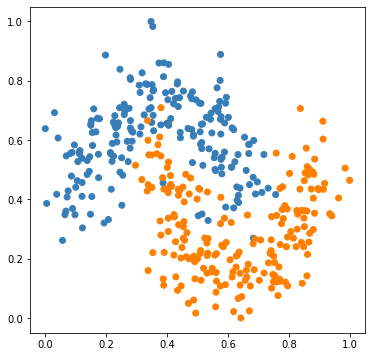

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(x_[:, 0], x_[:, 1], c=y_, cmap=cmap)
plt.show()

In [7]:
X = torch.from_numpy(x_.astype(np.float32))
y = torch.from_numpy(y_).type(torch.LongTensor)

In [8]:
dnn = DisjunctiveNormalNetwork(n_polytopes=2, m=4)

In [13]:
dnn.fit(X, y, epochs=5000, lr=0.01)

Epoch: 0, Accuracy: 0.9625
Epoch: 100, Accuracy: 0.9625
Epoch: 200, Accuracy: 0.9625
Epoch: 300, Accuracy: 0.9625
Epoch: 400, Accuracy: 0.9625
Epoch: 500, Accuracy: 0.9625
Epoch: 600, Accuracy: 0.9625
Epoch: 700, Accuracy: 0.9625
Epoch: 800, Accuracy: 0.9625
Epoch: 900, Accuracy: 0.9625


DisjunctiveNormalNetwork(m=4, n_polytopes=2)

In [14]:
h = 0.01
xx, yy = np.meshgrid(
    np.arange(x_[:, 0].min() - 0.1*abs(x_[:, 0].min()), x_[:, 0].max()*1.1, h),
    np.arange(x_[:, 1].min() - 0.1*abs(x_[:, 1].min()), x_[:, 1].max()*1.1, h))
xy_pairs = np.c_[xx.ravel(), yy.ravel()]
xy_pairs_tensor = torch.from_numpy(xy_pairs.astype(np.float32))

In [15]:
y_pred = dnn.predict_proba(xy_pairs_tensor)

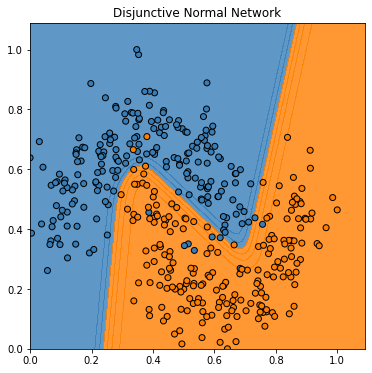

In [16]:
plt.figure(figsize=(6, 6))

plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_, cmap=cmap, edgecolor="k")

plt.title("Disjunctive Normal Network")
plt.show()

#### Individual polytopes
For intuition purposes the 2 polytopes forming the final network output are shown below

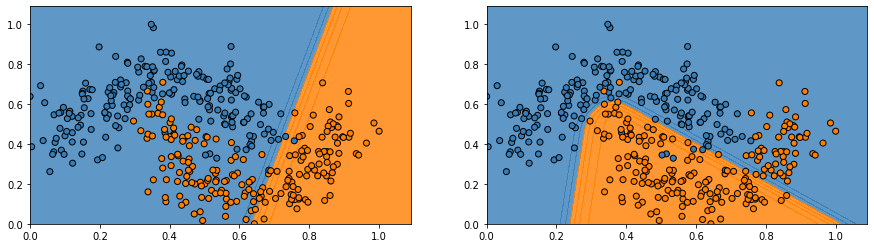

In [17]:
fig, ax = plt.subplots(1, dnn.n_polytopes, figsize=(15, 4))

for i, polytope in enumerate(dnn.polytopes):
    ax[i].contourf(xx, yy, polytope.value(xy_pairs_tensor).detach().numpy().reshape(xx.shape), cmap=cmap, alpha=0.8)
    ax[i].scatter(X[:, 0], X[:, 1], c=y_, cmap=cmap, edgecolor="k")

plt.show()

### Comparison with simple Decision Tree

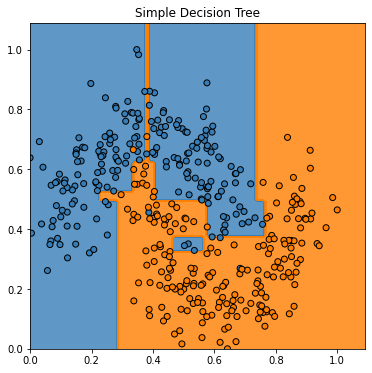

In [18]:
simple_tree = DecisionTreeClassifier()
simple_tree.fit(x_, y_)

y_pred_dt = simple_tree.predict_proba(xy_pairs)[:, 1]

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, y_pred_dt.reshape(xx.shape), cmap=cmap, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y_, cmap=cmap, edgecolor="k")

plt.title("Decision Tree")
plt.show()

In [19]:
simple_tree.get_depth()

9

In [20]:
np.mean(simple_tree.predict(x_) == y_)

1.0

## Circles

In [21]:
n_samples = 400
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.1)

In [22]:
x_, y_ = noisy_circles

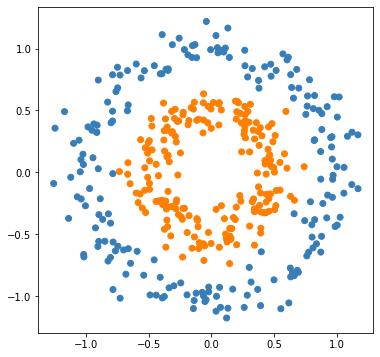

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(x_[:, 0], x_[:, 1], c=y_, cmap=cmap)
plt.show()

In [24]:
X = torch.from_numpy(x_.astype(np.float32))
y = torch.from_numpy(y_).type(torch.LongTensor)

In [25]:
dnn = DisjunctiveNormalNetwork(n_polytopes=1, m=4)

In [26]:
dnn.fit(X, y, epochs=1000, lr=0.1)

Epoch: 0, Accuracy: 0.5
Epoch: 100, Accuracy: 0.9825
Epoch: 200, Accuracy: 0.99
Epoch: 300, Accuracy: 0.9925
Epoch: 400, Accuracy: 0.9925
Epoch: 500, Accuracy: 0.9875
Epoch: 600, Accuracy: 0.9875
Epoch: 700, Accuracy: 0.99
Epoch: 800, Accuracy: 0.99
Epoch: 900, Accuracy: 0.99


DisjunctiveNormalNetwork(m=4, n_polytopes=1)

In [27]:
h = 0.01
xx, yy = np.meshgrid(
    np.arange(x_[:, 0].min() - 0.1*abs(x_[:, 0].min()), x_[:, 0].max()*1.1, h),
    np.arange(x_[:, 1].min() - 0.1*abs(x_[:, 1].min()), x_[:, 1].max()*1.1, h))
xy_pairs = np.c_[xx.ravel(), yy.ravel()]
xy_pairs_tensor = torch.from_numpy(xy_pairs.astype(np.float32))

In [28]:
y_pred = dnn.predict_proba(xy_pairs_tensor)

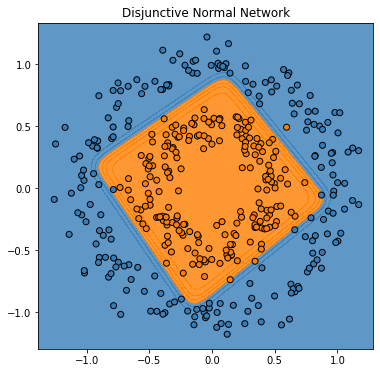

In [29]:
plt.figure(figsize=(6, 6))

plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_, cmap=cmap, edgecolor="k")

plt.title("Disjunctive Normal Network")
plt.show()

### Comparison with simple Decision Tree

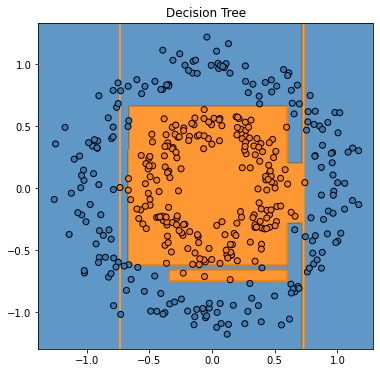

In [30]:
simple_tree = DecisionTreeClassifier()
simple_tree.fit(x_, y_)

y_pred_dt = simple_tree.predict_proba(xy_pairs)[:, 1]

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, y_pred_dt.reshape(xx.shape), cmap=cmap, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y_, cmap=cmap, edgecolor="k")

plt.title("Decision Tree")
plt.show()

In [31]:
simple_tree.get_depth()

7

In [32]:
np.mean(simple_tree.predict(x_) == y_)

1.0

## Spirals

In [33]:
def spirals(points, noise=0.5):
    n = np.sqrt(np.random.rand(points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(points),np.ones(points))))

In [34]:
n_samples = 400
noisy_spirals = spirals(n_samples, noise=1)

In [35]:
x_, y_ = noisy_spirals

In [36]:
scaler = MinMaxScaler()
x_ = scaler.fit_transform(x_)

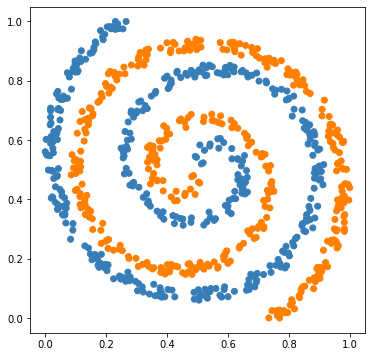

In [37]:
plt.figure(figsize=(6, 6))
plt.scatter(x_[:, 0], x_[:, 1], c=y_, cmap=cmap)
plt.show()

In [38]:
X = torch.from_numpy(x_.astype(np.float32))
y = torch.from_numpy(y_).type(torch.LongTensor)

In [39]:
dnn = DisjunctiveNormalNetwork(n_polytopes=20, m=10)

In [48]:
# This cell was run multiple times until accuracy is maximized
dnn.fit(X, y, epochs=1000, lr=0.1)

Epoch: 0, Accuracy: 0.94625
Epoch: 100, Accuracy: 0.94625
Epoch: 200, Accuracy: 0.94875
Epoch: 300, Accuracy: 0.94875
Epoch: 400, Accuracy: 0.95
Epoch: 500, Accuracy: 0.95
Epoch: 600, Accuracy: 0.95
Epoch: 700, Accuracy: 0.95
Epoch: 800, Accuracy: 0.95
Epoch: 900, Accuracy: 0.95


DisjunctiveNormalNetwork(m=10, n_polytopes=20)

In [49]:
h = 0.01
xx, yy = np.meshgrid(
    np.arange(x_[:, 0].min() - 0.1*abs(x_[:, 0].min()), x_[:, 0].max()*1.1, h),
    np.arange(x_[:, 1].min() - 0.1*abs(x_[:, 1].min()), x_[:, 1].max()*1.1, h))
xy_pairs = np.c_[xx.ravel(), yy.ravel()]
xy_pairs_tensor = torch.from_numpy(xy_pairs.astype(np.float32))

In [50]:
y_pred = dnn.predict_proba(xy_pairs_tensor)

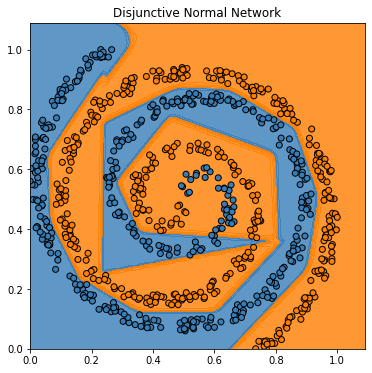

In [51]:
plt.figure(figsize=(6, 6))

plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=cmap, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_, cmap=cmap, edgecolor="k")

plt.title("Disjunctive Normal Network")
plt.show()

### Comparison with simple Decision Tree

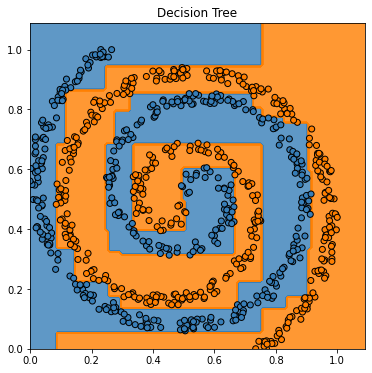

In [52]:
simple_tree = DecisionTreeClassifier()
simple_tree.fit(x_, y_)

y_pred_dt = simple_tree.predict_proba(xy_pairs)[:, 1]

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, y_pred_dt.reshape(xx.shape), cmap=cmap, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y_, cmap=cmap, edgecolor="k")

plt.title("Decision Tree")
plt.show()

In [53]:
simple_tree.get_depth()

18

In [54]:
np.mean(simple_tree.predict(x_) == y_)

1.0